In [1]:
import umap
import numpy as np
import pandas as pd
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10

from approaches.dae import DAENet
from approaches.mae import MAENet
from approaches.sae import SAENet
from approaches.simclr import SimCLRNet
from utils import plot_latent_space, plot_latent_space_with_annotations, visualize_reconstructions, embed_imgs, find_similar_images

/home/wojciech/projects/envs/ssne/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cpu")

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
test_set = CIFAR10(root="/home/wojciech/projects/datasets/cifar10", train=False, transform=transform, download=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False)

In [ ]:
def get_train_images(num):
    return torch.stack([test_set[i][0] for i in range(10,10+num)], dim=0)

# Masked-AutoEncoder

In [4]:
mae = MAENet()
mae.load_state_dict(torch.load("checkpoints/mae_17:55.pt", map_location=device))
mae.eval()

MAENet(
  (encoder): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(256, 3, kernel_size=(3, 3), stride=(2, 2), output_padding=(1, 1))
    (7): Sigmoid()
  )
)

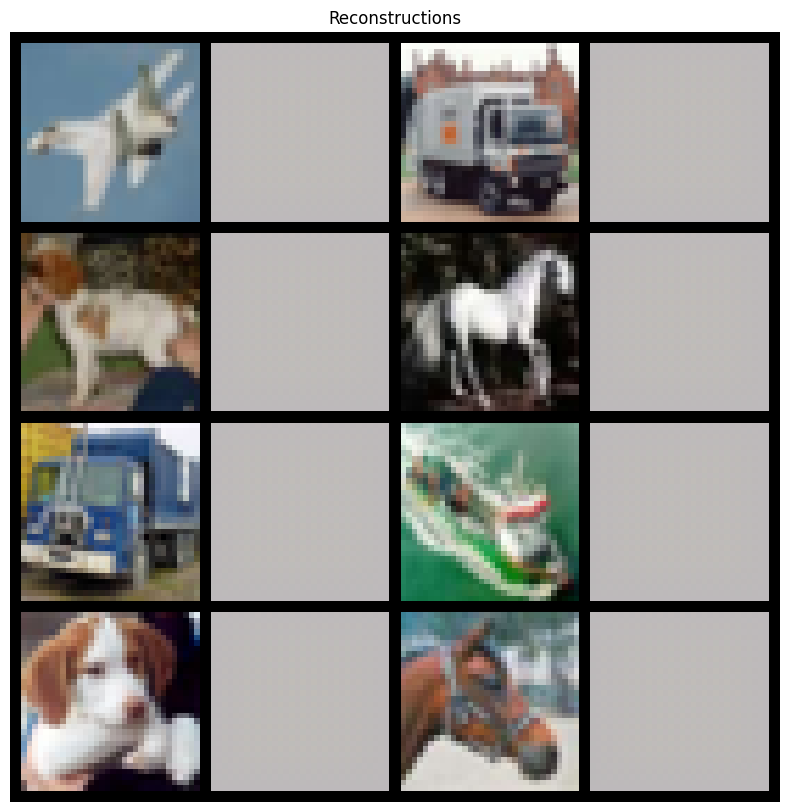

In [6]:
input_imgs = get_train_images(8)
visualize_reconstructions(mae, input_imgs, device)

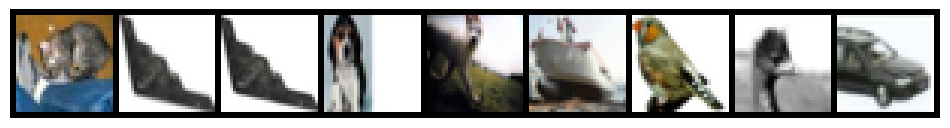

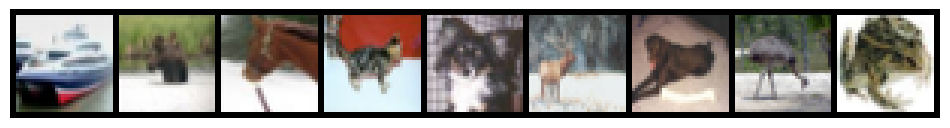

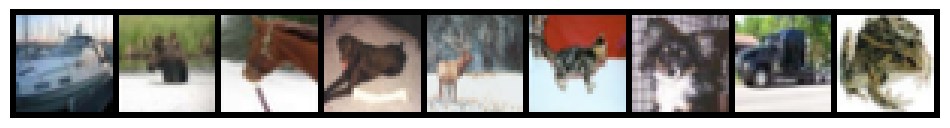

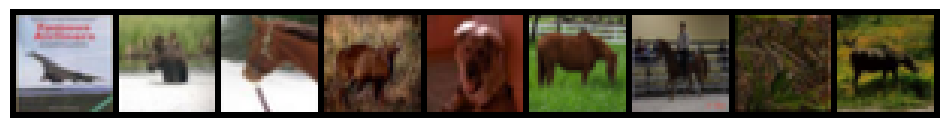

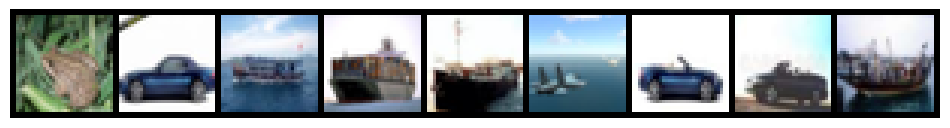

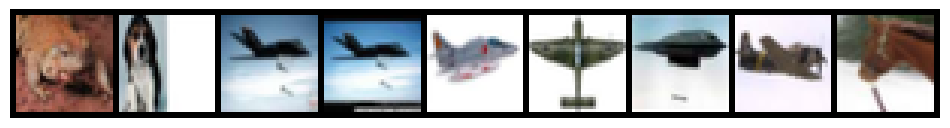

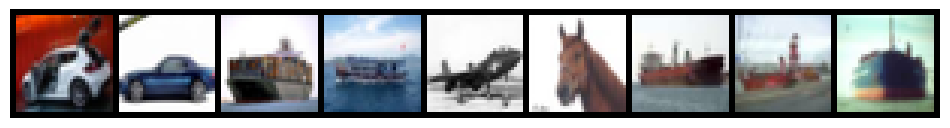

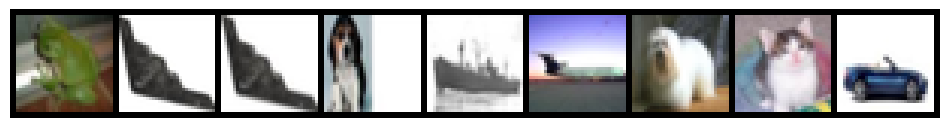

In [7]:
test_img_embeds = embed_imgs(mae, test_loader)
for i in range(8):
    find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=test_img_embeds)

In [8]:
umap = umap.UMAP(metric="cosine", n_neighbors=100)

In [9]:
test_embedded = umap.fit_transform(test_img_embeds[1][:5000])

In [10]:
data = pd.DataFrame(test_embedded)
data["label"] = test_img_embeds[2][:5000].cpu().numpy()

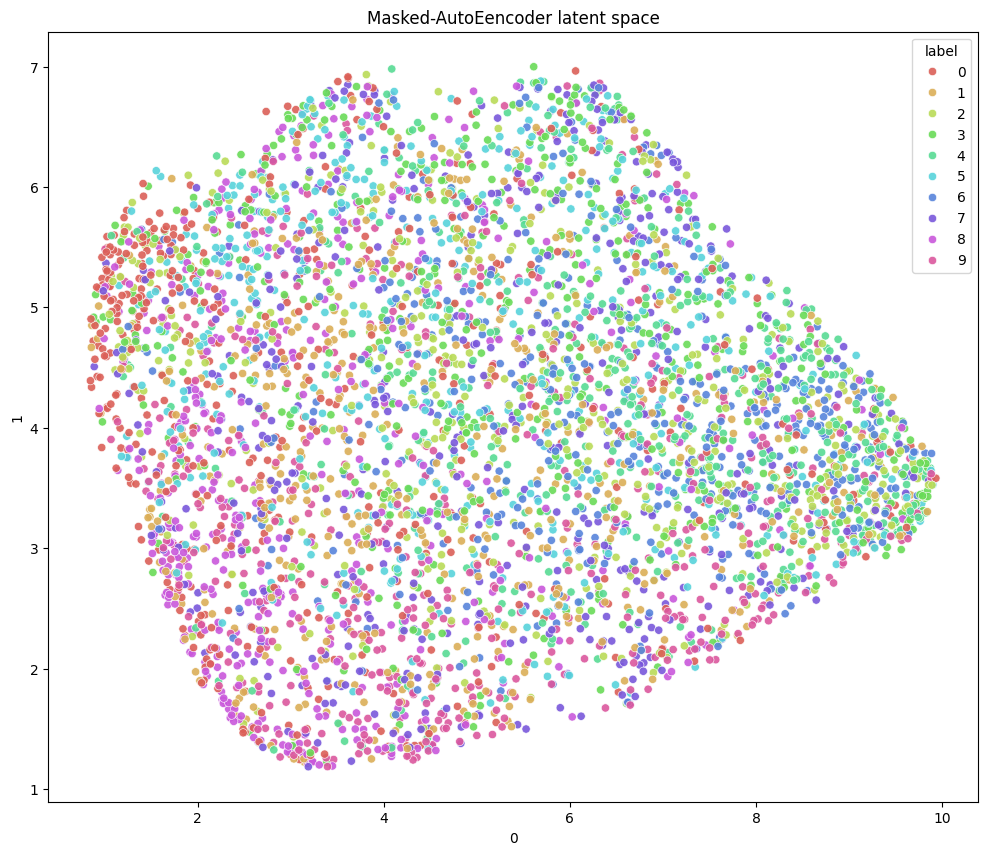

In [11]:
plot_latent_space(data, "Masked-Autoencoder")

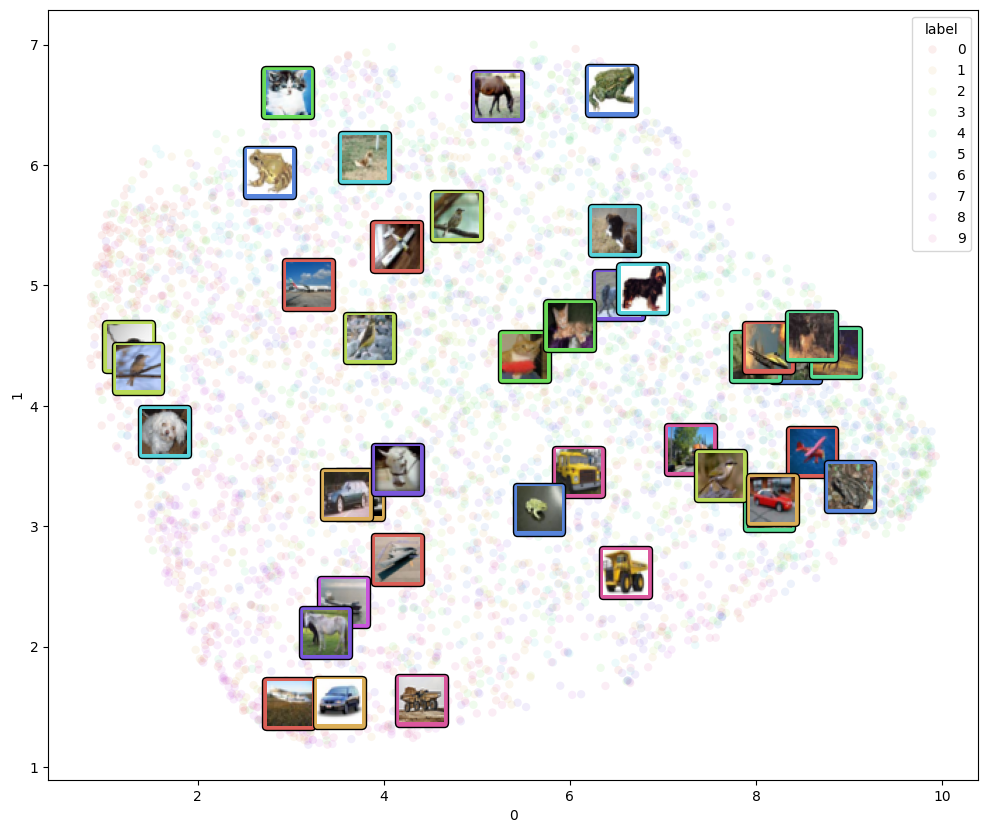

In [12]:
examples = []
examples_locations = []
for i in np.random.randint(0,5000,40):
    examples.append(test_img_embeds[0][i].cpu().numpy())
    examples_locations.append(data.iloc[i])
plot_latent_space_with_annotations(data, examples, examples_locations, "Masked-Autoencoder")

# Denoising Autoencoder

In [ ]:
dae = DAENet()
dae.load_state_dict(torch.load("checkpoints/dae_17:55.pt", map_location=device))
dae.eval()

In [ ]:
input_imgs = get_train_images(8)
visualize_reconstructions(dae, input_imgs, device)

In [ ]:
test_img_embeds = embed_imgs(dae, test_loader)
for i in range(8):
    find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=test_img_embeds)

In [ ]:
umap = umap.UMAP(metric="cosine", n_neighbors=100)
test_embedded = umap.fit_transform(test_img_embeds[1][:5000])

In [ ]:
data = pd.DataFrame(test_embedded)
data["label"] = test_img_embeds[2][:5000].cpu().numpy()
plot_latent_space(data, "Denoising Autoencoder")

In [ ]:
examples = []
examples_locations = []
for i in np.random.randint(0, 5000, 40):
    examples.append(test_img_embeds[0][i].cpu().numpy())
    examples_locations.append(data.iloc[i])
plot_latent_space_with_annotations(data, examples, examples_locations, "Denoising Autoencoder")

# Sparse Autoencoder

In [ ]:
sae = SAENet()
sae.load_state_dict(torch.load("checkpoints/sae_17:55.pt", map_location=device))
sae.eval()

In [ ]:
input_imgs = get_train_images(8)
visualize_reconstructions(sae, input_imgs, device)

In [ ]:
test_img_embeds = embed_imgs(sae, test_loader)
for i in range(8):
    find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=test_img_embeds)

In [ ]:
umap = umap.UMAP(metric="cosine", n_neighbors=100)
test_embedded = umap.fit_transform(test_img_embeds[1][:5000])

In [ ]:
data = pd.DataFrame(test_embedded)
data["label"] = test_img_embeds[2][:5000].cpu().numpy()
plot_latent_space(data, "Sparse Autoencoder")

In [ ]:
examples = []
examples_locations = []
for i in np.random.randint(0, 5000, 40):
    examples.append(test_img_embeds[0][i].cpu().numpy())
    examples_locations.append(data.iloc[i])
plot_latent_space_with_annotations(data, examples, examples_locations, "Sparse Autoencoder")

# SimCLR - Contrastive Learning

In [ ]:
simclr = SimCLRNet()
simclr.load_state_dict(torch.load("checkpoints/simclr_17:55.pt", map_location=device))
simclr.eval()

In [ ]:
input_imgs = get_train_images(8)
visualize_reconstructions(simclr, input_imgs, device)

In [ ]:
test_img_embeds = embed_imgs(simclr, test_loader)
for i in range(8):
    find_similar_images(test_img_embeds[0][i], test_img_embeds[1][i], key_embeds=test_img_embeds)

In [ ]:
umap = umap.UMAP(metric="cosine", n_neighbors=100)
test_embedded = umap.fit_transform(test_img_embeds[1][:5000])

In [ ]:
data = pd.DataFrame(test_embedded)
data["label"] = test_img_embeds[2][:5000].cpu().numpy()
plot_latent_space(data, "SimCLR")

In [ ]:
examples = []
examples_locations = []
for i in np.random.randint(0, 5000, 40):
    examples.append(test_img_embeds[0][i].cpu().numpy())
    examples_locations.append(data.iloc[i])
plot_latent_space_with_annotations(data, examples, examples_locations, "SimCLR")